Week 6 - PIMA (Eugene Abigail Setiawan - 0706022210061)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [3]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/eabigails/Week-6_DM/main/diabetes.csv', delimiter=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Menghapus nilai kosong
print("Cek nilai kosong:")
df.dropna(inplace=True)
df.isnull().sum()

Cek nilai kosong:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

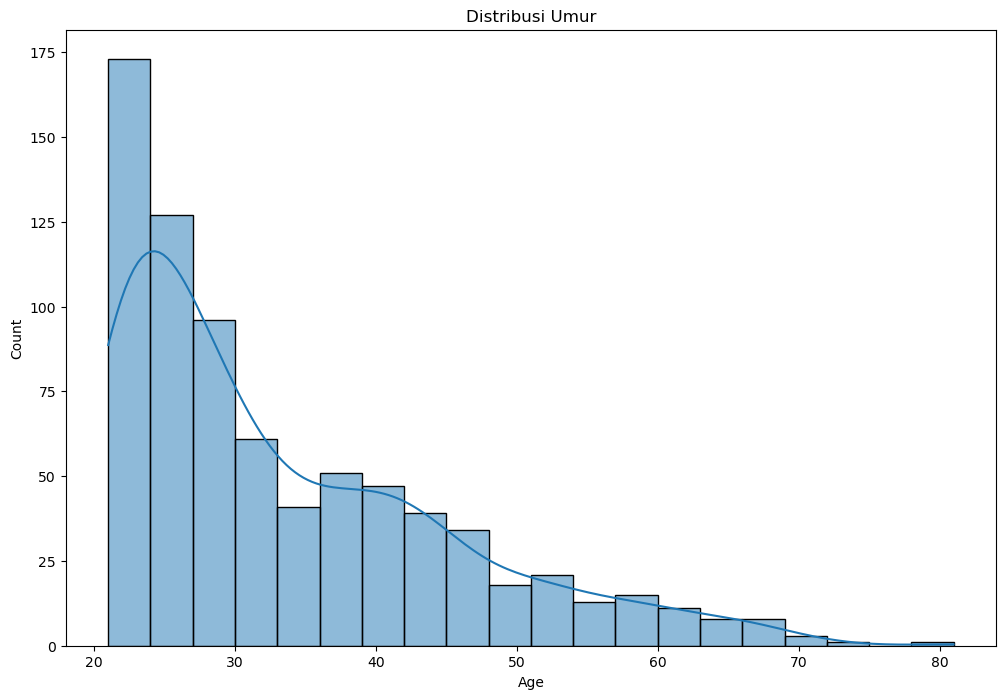

In [7]:
# Visualisasi dari distribusi umur 
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Umur')
plt.show()

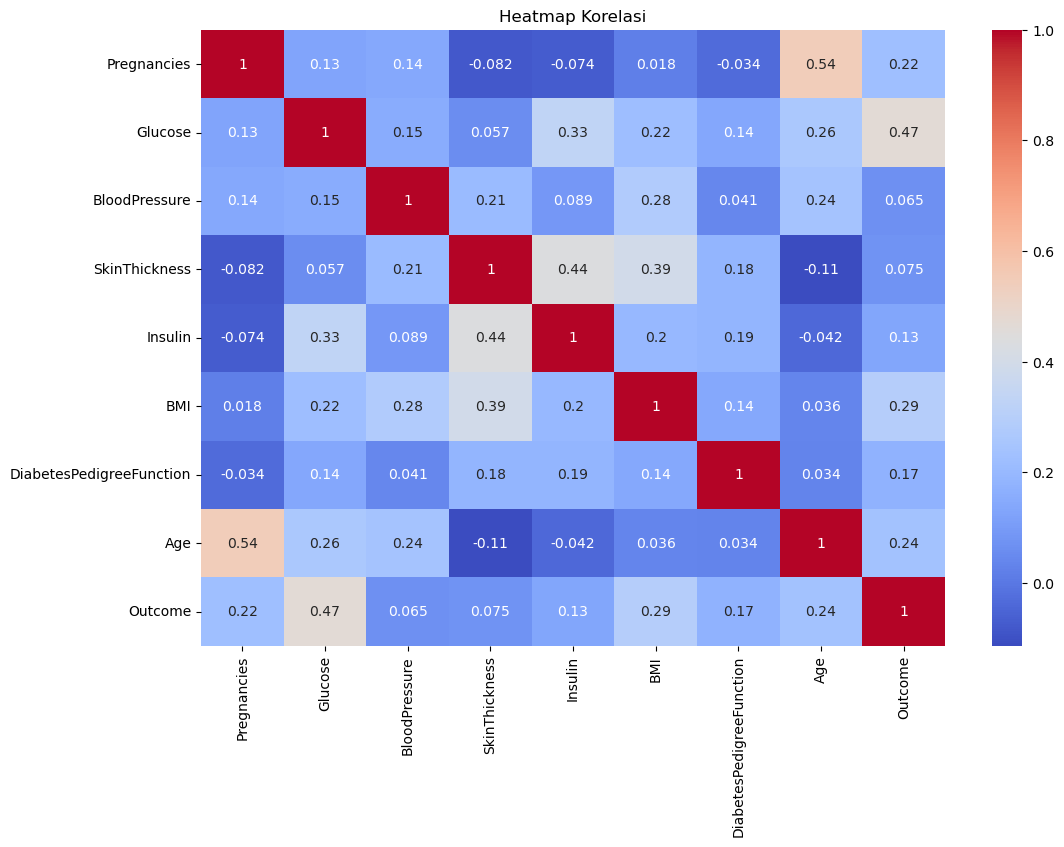

In [8]:
# Visualisasi heatmap (Semakin jauh dari angka 1 semakin tidak berkolerasi)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [9]:
# Langkah 6: Modeling
# Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)  # 'Outcome' adalah kolom target
y = df['Outcome']

In [10]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

Decision Tree using Gini index

In [12]:
# a. Define Model
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [13]:
# b. Predict the test set results
y_pred_gini = gini.predict(X_test)

In [14]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.7597


In [15]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(gini.score(X_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalue = 

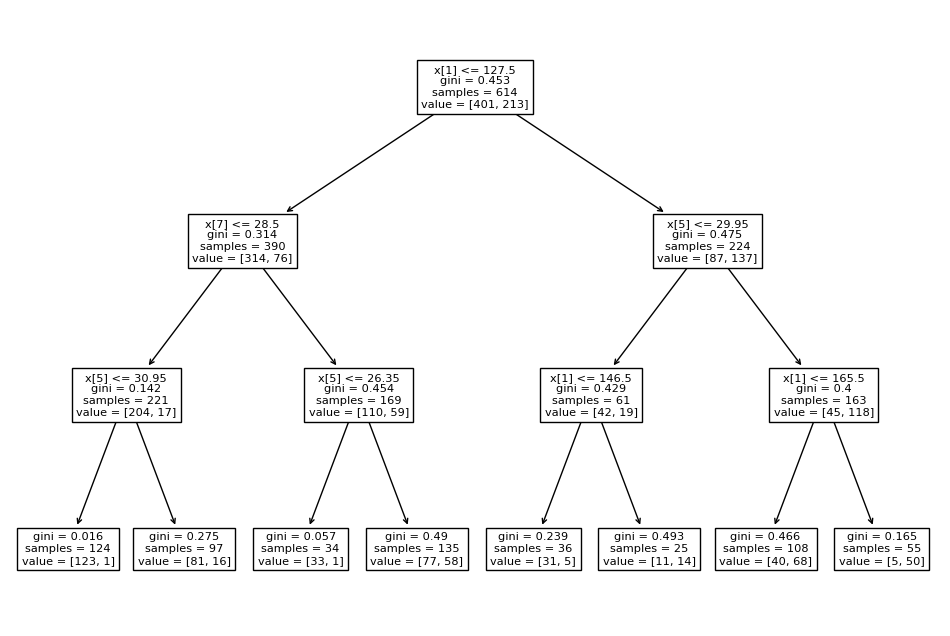

In [16]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(gini.fit(X_train, y_train))

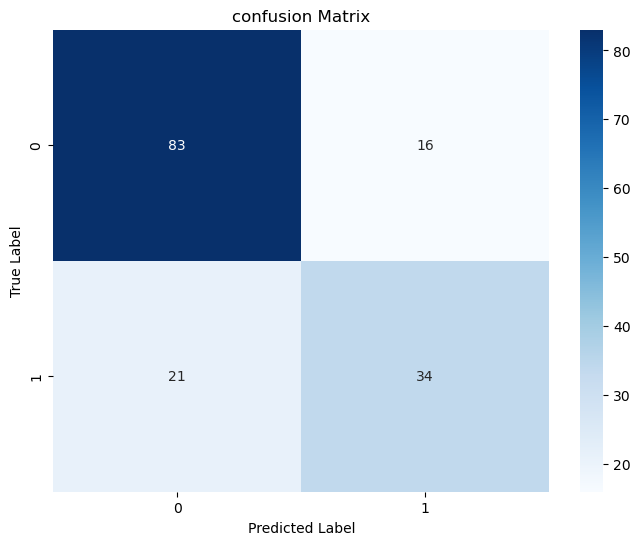

In [17]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
print("Gini")
print(classification_report(y_test, y_pred_gini))

Gini
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
# a.
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [20]:
# b.
nb_y_pred = nb_classifer.predict(X_test)

In [21]:
# c. 
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7662


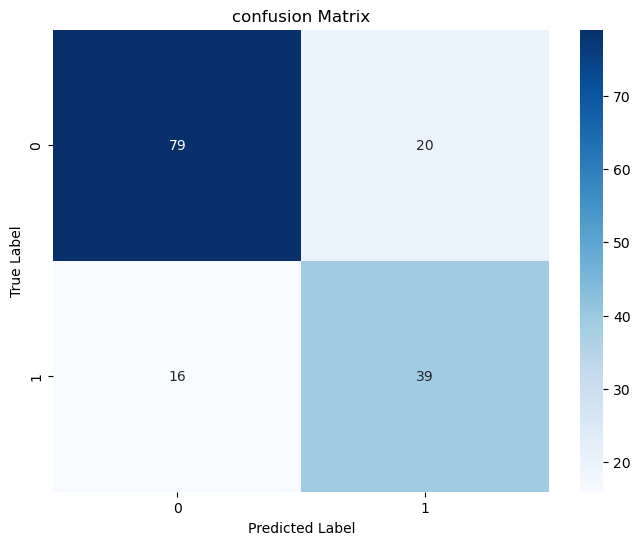

In [22]:
# d.
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
# e. Classification Report
print(classification_report(y_test, nb_y_pred))
print("Accuracy:", accuracy_score(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 0.7662337662337663


k-NN

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors - Classification Report")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

Accuracy: 0.6623376623376623


In [28]:
# Tabel perbandingan akurasi dari ketiga model
accuracy_scores = {
    "Decision Tree": accuracy_score(y_test, y_pred_gini),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Naive bayes": accuracy_score(y_test, nb_y_pred)
}

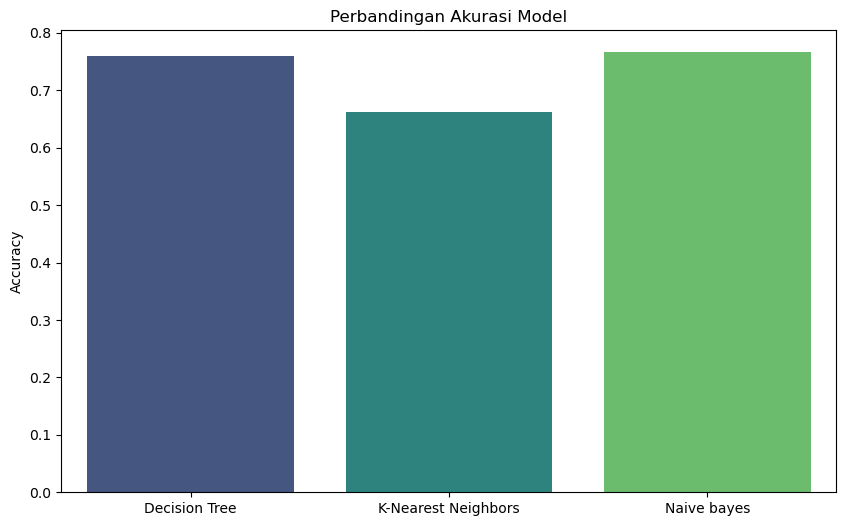

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()

**Kesimpulan:**

Naive bayes memberikan performa terbaik pada dataset ini dengan akurasi sebesar 76.62% diikuti oleh Decision Tree dan terakhir k-NN. 